In [107]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from tensorflow.keras import layers
from tensorflow.keras import losses

In [108]:
print("multi-class classification on Stack Overflow questions")

multi-class classification on Stack Overflow questions


In [109]:
print(tf.__version__)

2.16.1


In [110]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"

dataset = tf.keras.utils.get_file("stack_overflow", url, untar=True, cache_dir='.', cache_subdir='')

test_dir = "test"
train_dir = "train"

In [111]:
print(os.listdir(test_dir))
print(os.listdir(train_dir))

['python', 'java', 'csharp', 'javascript']
['python', 'java', 'csharp', 'javascript']


In [112]:
batch_size = 32
seed = 32

raw_train_dataset = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    labels="inferred",
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=seed
)

raw_train_dataset

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [113]:
for text_batch, label_batch in raw_train_dataset.take(1):
    for i in range(1):
        print(text_batch.numpy()[i])
        print(label_batch.numpy())
        print(len(label_batch.numpy()))
        print(label_batch.numpy()[i])
        print(raw_train_dataset.class_names[label_batch.numpy()[i]])
   

b'"array based deque implmentation i am following an online example and learning ""circular deque implementation in blank using array"". here is the online resource that i am following:..circular queue implementation..i have an array based deque class which has final capacity of 5. now if the array is full then i can have the methods create a temporary array of all the objects and then copy all the objects of temporary array back to ""object[] arr"". i have been at it for some time now but have not been able to get it going. i would appreciate if someone can help me understand the process here please. i have following class methods:...insertatfront().insertatlast().size().isempty().tostring()...here is my code:..public class arraydeque {..    private static final int init_capacity = 5;             .    private int front;                              .    private int rear;                                       .    private object[] arr;                           ...    public arraydeque

2024-05-22 23:01:41.649403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [114]:
raw_validation_dataset = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=seed,
)

raw_validation_dataset

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [115]:
raw_test_dataset = tf.keras.utils.text_dataset_from_directory(
    test_dir,
    batch_size=batch_size,
)

raw_test_dataset

Found 8000 files belonging to 4 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [116]:
max_features = 10000
sequence_length = 250 

vectorization_layer = layers.TextVectorization(
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
)

vectorization_layer

<TextVectorization name=text_vectorization_4, built=False>

In [117]:
train_text = raw_train_dataset.map(lambda batch, label: batch)
vectorization_layer.adapt(train_text)

2024-05-22 23:01:42.822966: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [118]:
print("1287 ---> ",vectorization_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorization_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorization_layer.get_vocabulary())))

1287 --->  magic
 313 --->  search
Vocabulary size: 10000


In [119]:
def vector_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorization_layer(text), label

In [148]:
train_dataset = raw_train_dataset.map(vector_text)
validation_dataset = raw_validation_dataset.map(vector_text)
test_dataset = raw_test_dataset.map(vector_text)

In [149]:
embedding_dim = 16

model = tf.keras.Sequential([
    layers.Embedding(max_features, embedding_dim),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(4, activation="sigmoid")
])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [160]:
model.compile(
    optimizer="adam",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

In [161]:
epochs = 10

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7725 - loss: 0.7344 - val_accuracy: 0.7513 - val_loss: 0.7732
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7879 - loss: 0.6957 - val_accuracy: 0.7581 - val_loss: 0.7528
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7887 - loss: 0.6690 - val_accuracy: 0.7550 - val_loss: 0.7225
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8058 - loss: 0.6365 - val_accuracy: 0.7575 - val_loss: 0.7074
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8012 - loss: 0.6093 - val_accuracy: 0.7675 - val_loss: 0.6919
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8214 - loss: 0.5849 - val_accuracy: 0.7575 - val_loss: 0.6725
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8169 - loss: 0.5664 - val_accuracy: 0.7688 - val_loss: 0.6558
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8185 - loss: 0.5411 - val_accuracy: 0.

In [162]:
loss, accuracy = model.evaluate(test_dataset)

print("Loss:", loss)
print("Accuracy:", accuracy)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7805 - loss: 0.6134
Loss: 0.6227101683616638
Accuracy: 0.7767500281333923


In [163]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

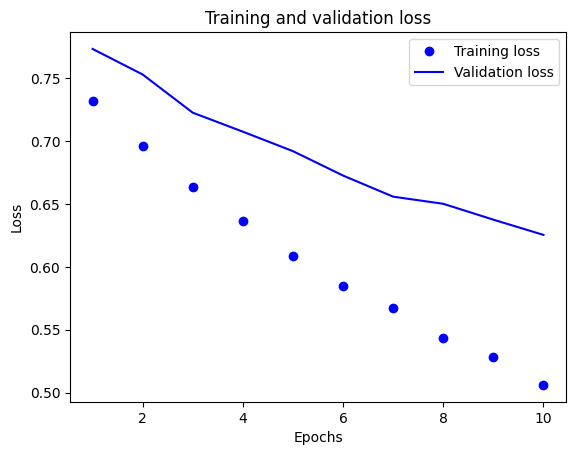

In [164]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

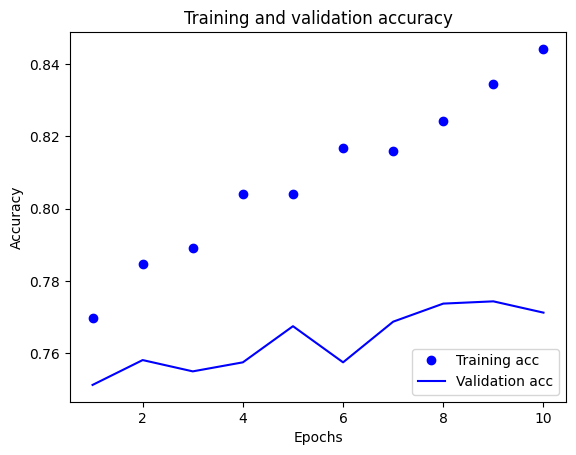

In [165]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [168]:
export_model = tf.keras.Sequential([
    vectorization_layer,
    model,
    layers.Activation('sigmoid')
])

export_model.compile(
    optimizer="adam",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

acc = export_model.evaluate(raw_test_dataset)
acc

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7772 - loss: 0.0000e+00


[0.0, 0.0, 0.7767500281333923, 0.7767500281333923]

In [169]:
examples = tf.constant([
  "how to write dictionary in Python python",
  "class implements interface Console.Writeln()",
  "java virtual machine system.out.println()",
  "add click on button"
])

predictions = export_model.predict(examples)
for i in predictions:
    max_value = np.argmax(i)
    print(raw_train_dataset.class_names[max_value])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
python
java
javascript
javascript
